# Model Selection 

The objective of this notebook is to build a very first ent to end Machine Learning model to predict the probability of a patient being discharged on a particular day.

We'll use the dataset generated by the `dataset` job of the ETL folder. 

At this instance, the focus won't be on model performance but rather on understanding the value potential of the available data and the speedness of the solution.

In [1]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from matplotlib import pyplot as plt   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from thesis_lib.utils import * 
from thesis_lib.modelling.data import *
from thesis_lib.modelling.model import *


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = Data().load('data/hospital_dataset')
variables = data.get_variables_dict()
data.get_stats()

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


dataset_type,train,val,test
n_observations,319150,33482,33309
relative_size,0.82694,0.0867542,0.0863059
n_cols,71,71,71
positives,42697,4555,4507
negatives,276453,28927,28802
positive_prop,0.133783,0.136043,0.135309
negative_prop,0.866217,0.863957,0.864691
min_date,2017-01-01,2018-11-11,2018-11-11
max_date,2018-11-10,2019-11-11,2019-11-11


In [4]:
sequence_features = ['labos_studies_names','sectors_names','images_study_types','surgeries_types',
                    'surgeries_injury_condition','surgeries_post_surgery_condition','surgeries_anesthesia_types']

In [5]:
text_features = ['administrative_diagnosis','presumptive_dianogsis','images_studies_names',
                'surgeries_actual']

In [6]:
categorical_features = ['date_weekday',
 'request_origin',
 'origin',
 'entity_group',
 'gender',
 'request_sector',
 'insurance_entity',
 'admission_sector',
 'emergency_service',
 'isolation',
 'ARM_TEP',
 'CEC_TEP',
 'request_sector',
 'date_weekday',
 'admission_weekday',
 'date_month',
 'admission_month']

In [7]:
numerical_features = ['PIM2TEP',
 'emergency_service',
 'high_risk_TEP',
 'hosp_day_number',
 'images_count',
 'images_cumulative',
 'images_emergencies',
 'images_requester_roles_count',
 'images_requesters_count',
 'images_study_types_count',
 'labos_count',
 'labos_cumulative',
 'labos_emergencies',
 'labos_requester_roles_count',
 'labos_requesters_count',
 'labos_set_count',
 'labos_set_cumulative',
 'low_risk_TEP',
 'new_born_gestation_age',
 'new_born_weight',
 'patient_age',
 'sectors_count',
 'sectors_last_stay',
 'surgeries_count',
 'surgeries_cumulative',
 'surgeries_post_surgery_duration',
 'surgeries_pre_surgery_duration',
 'surgeries_prep_duration',
 'surgeries_services_count',
 'surgeries_surgery_delay',
 'surgeries_surgery_duration',
 'surgeries_types_count']

### Text only

In [8]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                #'categorical_features' : categorical_features ,
                #'numerical_features' : numerical_features,
               'text_features': text_features,
               # 'sequence_features':sequence_features
               }

In [9]:
lgbm_text_features = Model(**model_params)
lgbm_text_features.transform(data)

Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
Transforming data...
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings


In [10]:
%%time
lgbm_text_features.fit_classifier()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.69392	validation_set's auc: 0.668447
[20]	training_set's auc: 0.709845	validation_set's auc: 0.683521
[30]	training_set's auc: 0.722275	validation_set's auc: 0.692521
[40]	training_set's auc: 0.731797	validation_set's auc: 0.701275
[50]	training_set's auc: 0.738053	validation_set's auc: 0.706732
[60]	training_set's auc: 0.743902	validation_set's auc: 0.711759
[70]	training_set's auc: 0.748541	validation_set's auc: 0.715209
[80]	training_set's auc: 0.752249	validation_set's auc: 0.717535
[90]	training_set's auc: 0.755838	validation_set's auc: 0.719348
[100]	training_set's auc: 0.758008	validation_set's auc: 0.720087
CPU times: user 33.4 s, sys: 244 ms, total: 33.6 s
Wall time: 9.16 s


In [40]:
lgbm_text_features.classifier.get_params()

{'objective': 'binary',
 'metric': 'auc',
 'is_unbalance': True,
 'max_depth': 7,
 'learning_rate': 0.1,
 'num_iterations': 100}

In [11]:
lgbm_text_features.get_performance_metrics()

training AUC ROC score:  0.7579774616121809
validation AUC ROC score:  0.7200873602224488
relative over-fitting:  0.04998842750435053


In [12]:
len(lgbm_text_features.model_features)

14779

### Sequence only

In [13]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                #'categorical_features' : categorical_features ,
                #'numerical_features' : numerical_features,
               #'text_features': text_features,
                'sequence_features':sequence_features
               }

In [14]:
lgbm_seq_features = Model(**model_params)
lgbm_seq_features.transform(data)


Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
Transforming data...
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming t

In [15]:
%%time
lgbm_seq_features.fit_classifier()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.698737	validation_set's auc: 0.685084
[20]	training_set's auc: 0.703103	validation_set's auc: 0.687313
[30]	training_set's auc: 0.706388	validation_set's auc: 0.691914
[40]	training_set's auc: 0.70877	validation_set's auc: 0.691781
[50]	training_set's auc: 0.710889	validation_set's auc: 0.693131
[60]	training_set's auc: 0.71294	validation_set's auc: 0.694717
[70]	training_set's auc: 0.714299	validation_set's auc: 0.695125
[80]	training_set's auc: 0.715544	validation_set's auc: 0.695703
[90]	training_set's auc: 0.717026	validation_set's auc: 0.696903
[100]	training_set's auc: 0.718395	validation_set's auc: 0.697441
CPU times: user 23.5 s, sys: 546 ms, total: 24 s
Wall time: 21.7 s


In [16]:
lgbm_seq_features.get_performance_metrics()

training AUC ROC score:  0.7184077204909911
validation AUC ROC score:  0.6974411267364911
relative over-fitting:  0.029184811293746355


In [17]:
len(lgbm_seq_features.model_features)

4348

In [18]:
lgbm_seq_features.classifier.get_params()

{'objective': 'binary',
 'metric': 'auc',
 'is_unbalance': True,
 'max_depth': 7,
 'learning_rate': 0.1,
 'num_iterations': 100,
 'feature_names': ['17_beta_estradiol',
  '17_hidroxiprogesterona',
  '2__eql_',
  '2__eql__acido_lactico_en_sangre',
  '2__eql__albumina_en_sangre',
  '2__eql__bilirrubinemia_total_y_directa',
  '2__eql__c3_complemento',
  '2__eql__calcemia_total',
  '2__eql__calcio_ionico',
  '2__eql__chagas__elisa_',
  '2__eql__chagas__hemoaglutinacion_',
  '2__eql__chagas__ifi_',
  '2__eql__citomegalovirus_igg',
  '2__eql__coagulograma_basico',
  '2__eql__colesterol_en_sangre',
  '2__eql__complemento_total',
  '2__eql__cpk',
  '2__eql__eritrosedimentacion',
  '2__eql__ferremia',
  '2__eql__gases_arteriales',
  '2__eql__glucosa_en_sangre',
  '2__eql__hemoglobina_glicosilada__hba1c___',
  '2__eql__hemograma',
  '2__eql__hepatitis_b_ac_de_superficie__eql_',
  '2__eql__hepatitis_b_ag_de_superficie__eql_',
  '2__eql__hepatitis_b_ag_de_superficie__eql___',
  '2__eql__hepatitis_

### Sequence + text

In [19]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                #'categorical_features' : categorical_features ,
                #'numerical_features' : numerical_features,
               'text_features': text_features,
                'sequence_features':sequence_features
               }

In [20]:
lgbm_comb_text_features = Model(**model_params)
lgbm_comb_text_features.transform(data)


Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
Transforming data...
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming sequence features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 

In [21]:
%%time
lgbm_comb_text_features.fit_classifier()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.748973	validation_set's auc: 0.7349
[20]	training_set's auc: 0.760099	validation_set's auc: 0.743994
[30]	training_set's auc: 0.770171	validation_set's auc: 0.752315
[40]	training_set's auc: 0.776503	validation_set's auc: 0.756726
[50]	training_set's auc: 0.781776	validation_set's auc: 0.760996
[60]	training_set's auc: 0.78584	validation_set's auc: 0.763652
[70]	training_set's auc: 0.789711	validation_set's auc: 0.765862
[80]	training_set's auc: 0.793097	validation_set's auc: 0.767502
[90]	training_set's auc: 0.795726	validation_set's auc: 0.768358
[100]	training_set's auc: 0.798595	validation_set's auc: 0.770209
CPU times: user 52 s, sys: 993 ms, total: 53 s
Wall time: 44.8 s


In [36]:
len(lgbm_comb_text_features.model_features)

21069

In [24]:
lgbm_comb_text_features.get_performance_metrics()

training AUC ROC score:  0.7977861907808528
validation AUC ROC score:  0.7677415920016991
relative over-fitting:  0.037659963441767245


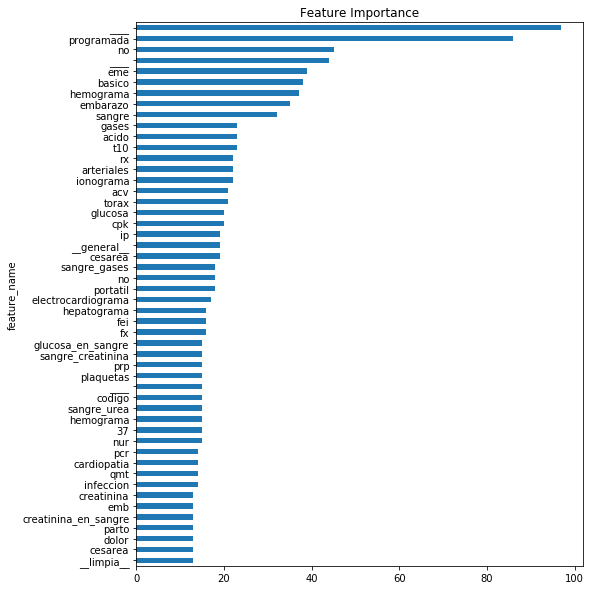

In [25]:
lgbm_comb_text_features.plot_feature_importance(50)

In [16]:
lgbm_param_grid = {'max_depth': [3,7,10],
                  'learning_rate': [0.1,0.01,0.001,0.0001],
                  'num_iterations': [50,100,150,200,250]}

In [ ]:
lgbm_text_features.optimize_hyperparams(params_dict=lgbm_param_grid,
                                         n_folds=3,n_iter=5,
                                         search_type='grid')

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
exp_results = lgbm_text_features.get_model_selection_results()

In [ ]:
exp_results.to_csv('experiments/lgb_text_features_grid_search_results.csv')

In [ ]:
best_params = lgbm_text_features.model_selection.best_params_
best_params

In [ ]:
lgbm_text_features.fit_best_classifier()

In [ ]:
lgbm_text_features.get_performance_metrics()